### Packages

In [6]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import seaborn as sns
#import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

### Loading the data

In [8]:
# Load the data
df = pd.read_csv("D:/New folder/Python/Time series/Index2018.csv")
df.date = pd.to_datetime(df.date, dayfirst=True)
df.set_index("date", inplace=True)
df = df.asfreq("b")  # Setting frequency to business days
# Correctly using forward fill for NaN values
df = df.fillna(method='ffill')  # Forward filling missing data

In [10]:
df_comp = df.copy()


In [34]:
df_comp.tail()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei
date,,,,,,,,
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,0.217307,0.212382,0.712360,1.292475
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,-0.055875,-1.143311,-1.068321,-0.760110
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,0.060229,-0.360951,-0.867553,-1.133171
2018-01-26,2872.867839,13340.17,7665.541292,23631.88,1.183931,0.652605,0.314400,-0.158897
2018-01-29,2853.528411,13324.48,7671.533300,23629.34,-0.673175,0.078168,-0.117615,-0.010748


### Creating Returns

In [12]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1)*100
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1)*100
df_comp['ret_dax'] = df_comp.dax.pct_change(1)*100
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1)*100

### Splitting the Data

In [14]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### Fitting a Model

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df.ftse' is your time series data
model_ar = ARIMA(df.ftse, order=(1, 0, 0))  # ARMA(1,0) is equivalent to ARIMA(1,0,0)
results_ar = model_ar.fit()

# Print the summary of the model
#print(results_ar.summary())


### Simple Forecasting Using AR

In [31]:
df.tail()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei
date,,,,,,,,
2013-04-01,1562.173837,7795.31,6411.74,12135.02,-0.446858,0.000000,0.000000,-2.120438
2013-04-02,1570.252238,7943.87,6490.66,12003.43,0.517126,1.230867,1.905761,-1.084382
2013-04-03,1553.686978,7874.75,6420.28,12362.20,-1.054943,-1.084327,-0.870105,2.988896
2013-04-04,1559.979316,7817.39,6344.11,12634.54,0.404994,-1.186397,-0.728404,2.203006
2013-04-05,1553.278930,7658.75,6249.77,12833.64,-0.429518,-1.487049,-2.029322,1.575839


In [36]:
df.head()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei
date,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,1.142796,-0.156704,0.002247,1.762469
1994-01-11,474.13,2228.10,3413.77,18485.25,-0.239864,-0.779229,0.139326,0.226693
1994-01-12,474.17,2182.06,3372.02,18793.88,0.008437,-1.222988,-2.066335,1.669601
1994-01-13,472.47,2142.37,3360.01,18577.26,-0.358521,-0.356166,-1.818923,-1.152609


In [18]:
start_date='2013-04-06'
end_date='2018-01-29'

In [20]:
df_pred=results_ar.predict(start=start_date,end=end_date)

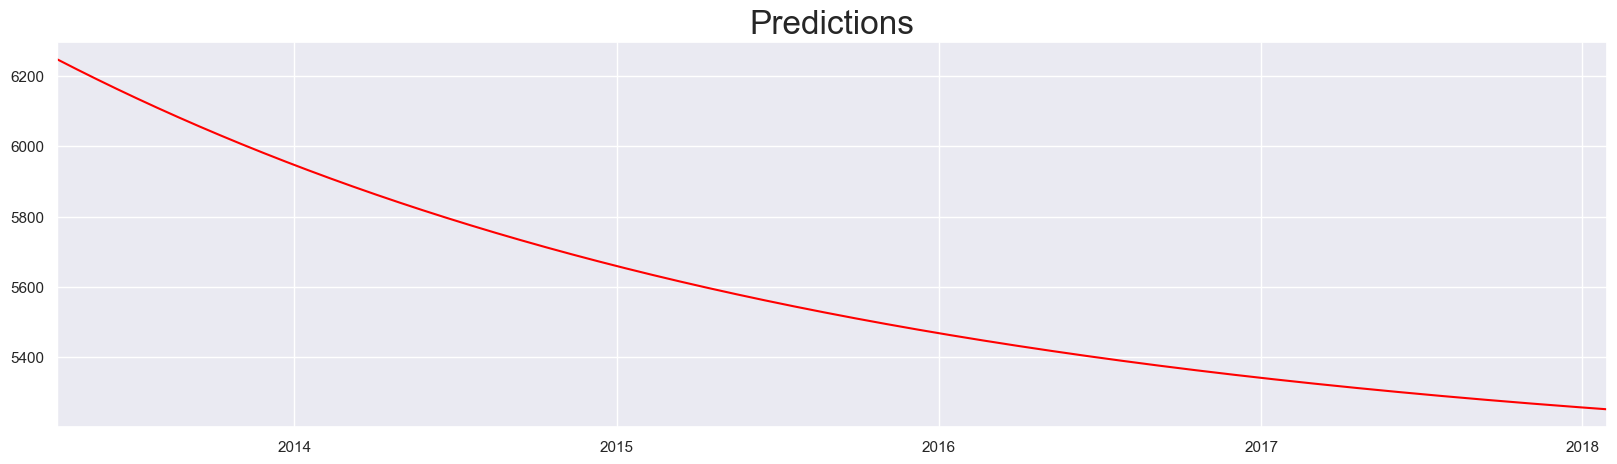

In [22]:
df_pred[start_date:end_date].plot(figsize=(20,5),color="red")
plt.title("Predictions",size=24)
plt.show()

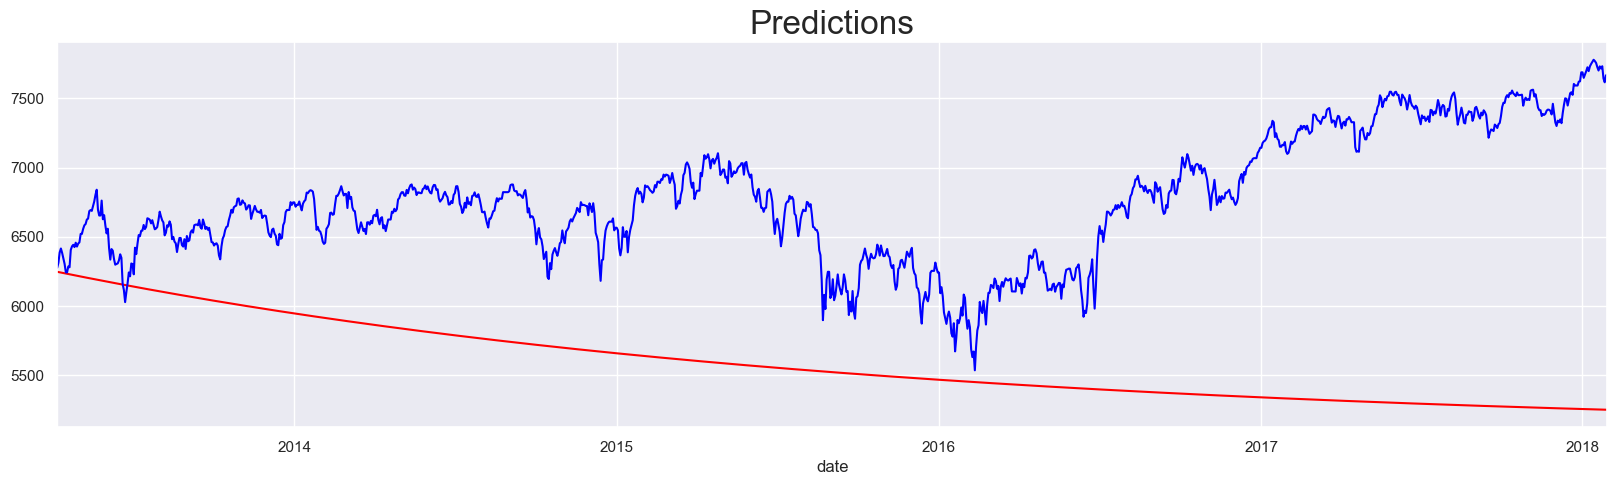

In [24]:
df_pred[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions",size=24)
plt.show()

AR model is not good for estimating non-stationary data

#### Using returns instead

In [32]:

# Assuming 'df.ftse' is your time series data
model_ret_ar = ARIMA(df.ret_ftse[1:], order=(1, 0, 0))  # ARMA(1,0) is equivalent to ARIMA(1,0,0)
results_ret_ar = model_ret_ar.fit()

df_ret_pred=results_ret_ar.predict(start=start_date,end=end_date)

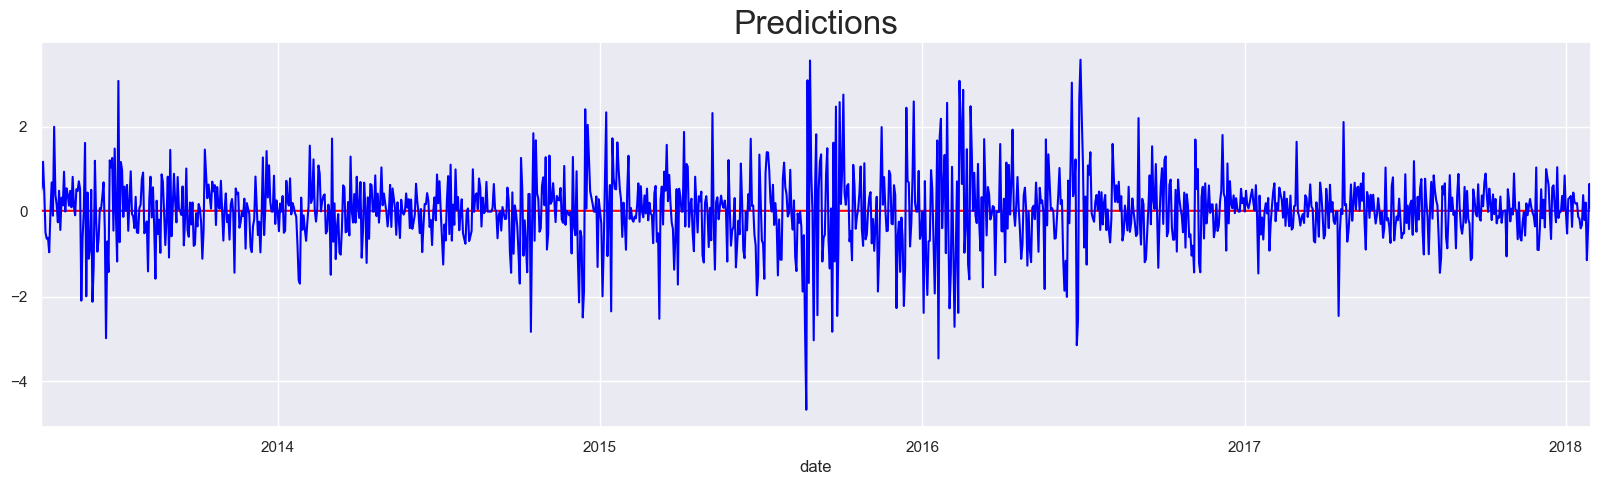

In [36]:
df_ret_pred[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions",size=24)
plt.show()

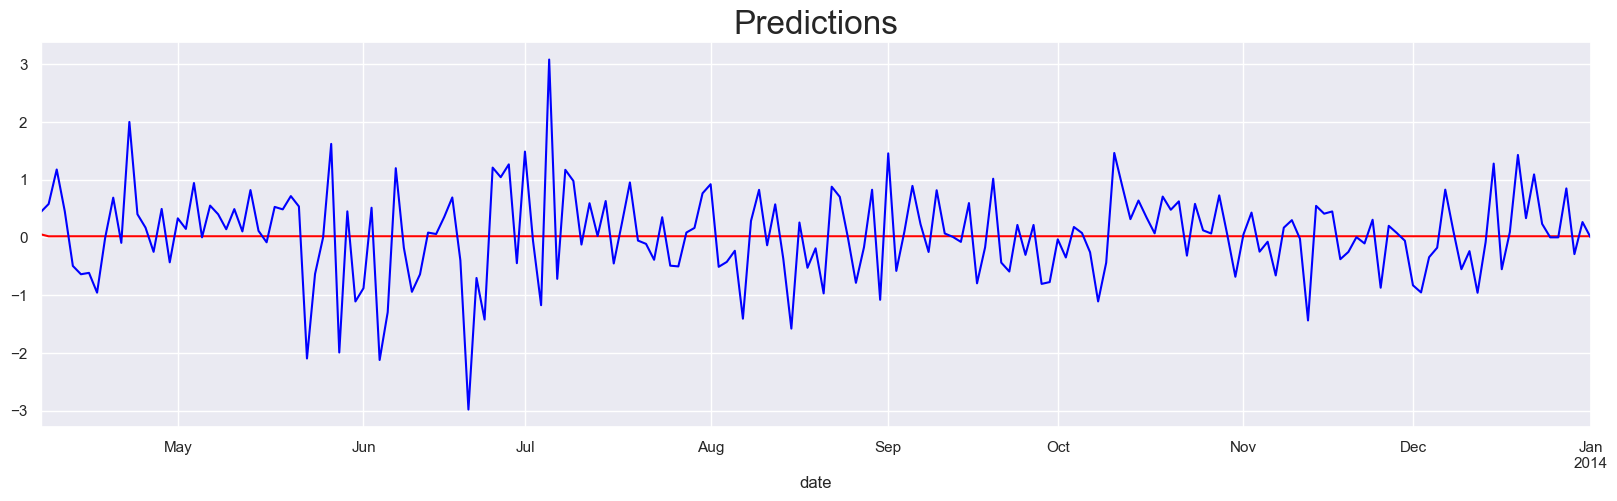

In [40]:
end_date="2014-01-01"

df_ret_pred[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions",size=24)
plt.show()

In [42]:
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Fri, 30 Aug 2024   AIC                          15865.497
Time:                        11:20:26   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## MA

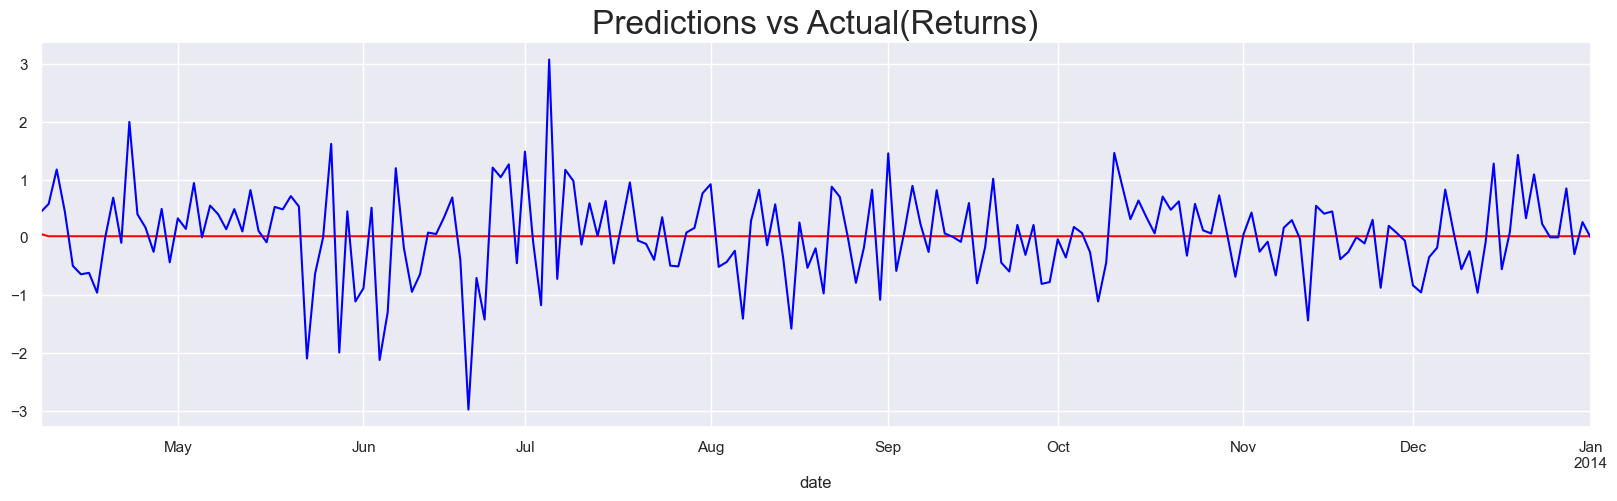

In [48]:
model_ret_ma = ARIMA(df.ret_ftse[1:], order=(0, 0, 1))  # ARMA(1,0) is equivalent to ARIMA(1,0,0)
results_ret_ma = model_ret_ma.fit()

df_ret_pred_ma=results_ret_ma.predict(start=start_date,end=end_date)

df_ret_pred_ma[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual(Returns)",size=24)
plt.show()

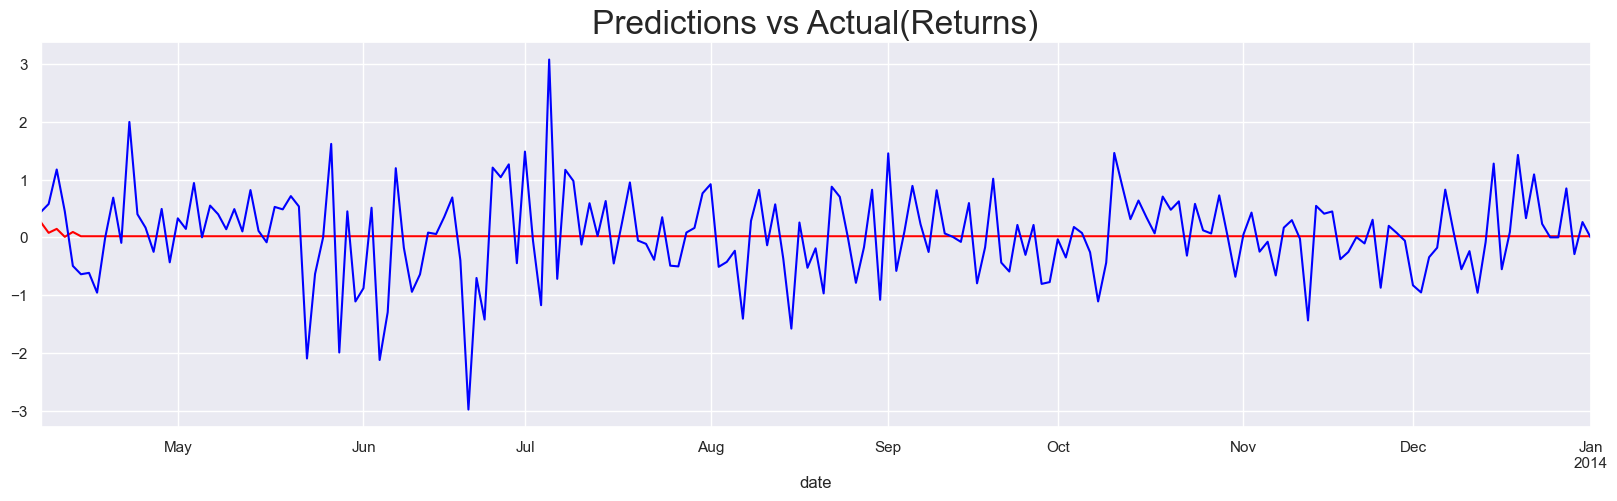

In [50]:
model_ret_ma5 = ARIMA(df.ret_ftse[1:], order=(0, 0, 5))  # ARMA(1,0) is equivalent to ARIMA(1,0,0)
results_ret_ma5 = model_ret_ma5.fit()

df_ret_pred_ma5=results_ret_ma5.predict(start=start_date,end=end_date)

df_ret_pred_ma5[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual(Returns)",size=24)
plt.show()

## ARMA

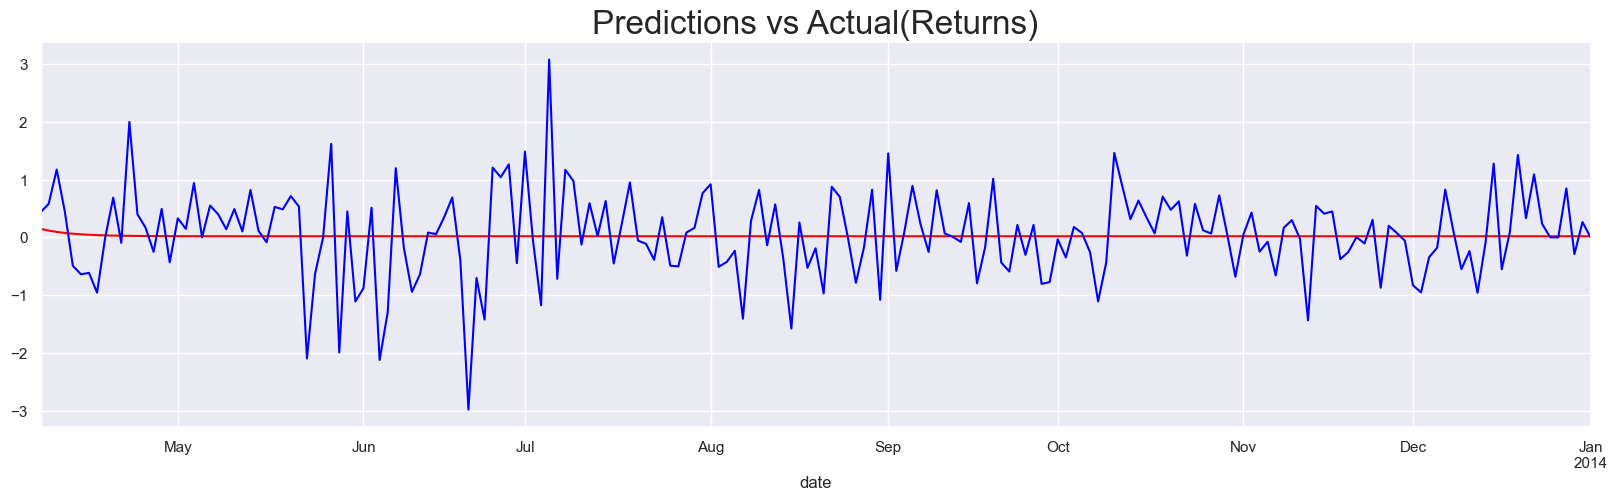

In [53]:
model_ret_arma11 = ARIMA(df.ret_ftse[1:], order=(1, 0, 1))  # ARMA(1,0) is equivalent to ARIMA(1,0,0)
results_ret_arma11 = model_ret_arma11.fit()

df_ret_pred_arma11=results_ret_arma11.predict(start=start_date,end=end_date)

df_ret_pred_arma11[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual(Returns)",size=24)
plt.show()

## ARMAX

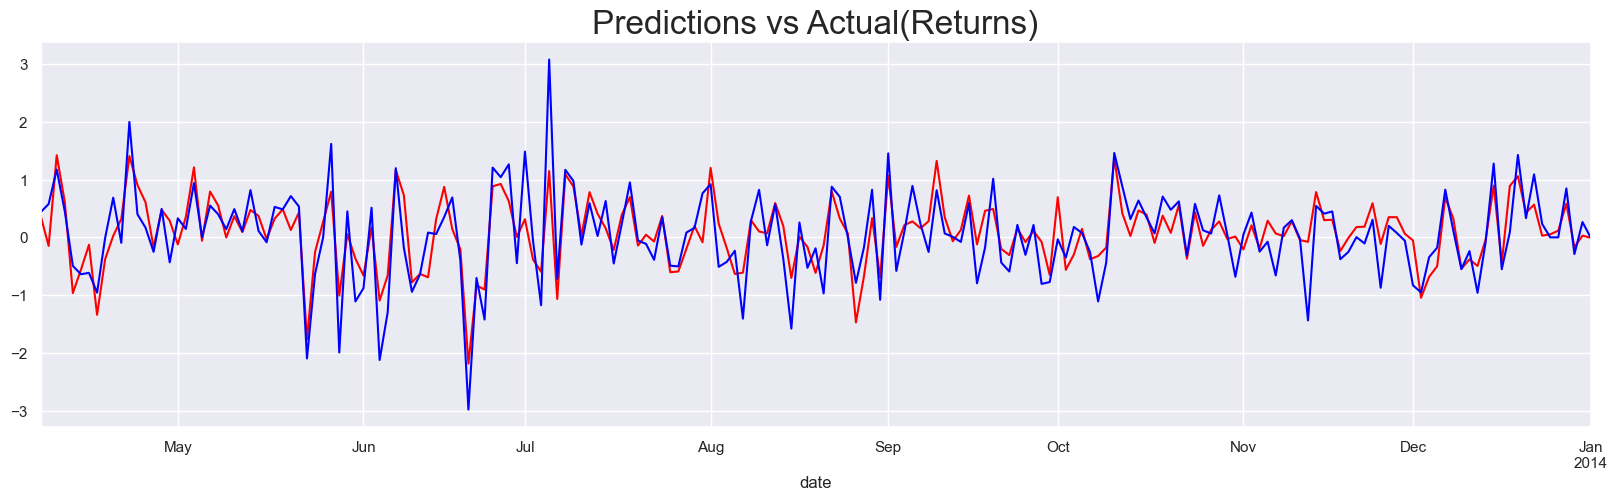

In [58]:
model_ret_armax=ARIMA(df.ret_ftse[1:],exog= df[['ret_spx','ret_dax','ret_nikkei']][1:], order= (1,0,1), trend="t")
results_ret_armax=model_ret_armax.fit()
#results_ret_armax.summary()

df_ret_pred_armax=results_ret_armax.predict(start=start_date,end=end_date,
                                           exog= df_test[['ret_spx','ret_dax','ret_nikkei']][start_date:end_date])
df_ret_pred_armax[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual(Returns)",size=24)
plt.show()


Although ARMAX gives better predictions, they are not using for forcasting.

## SARMA

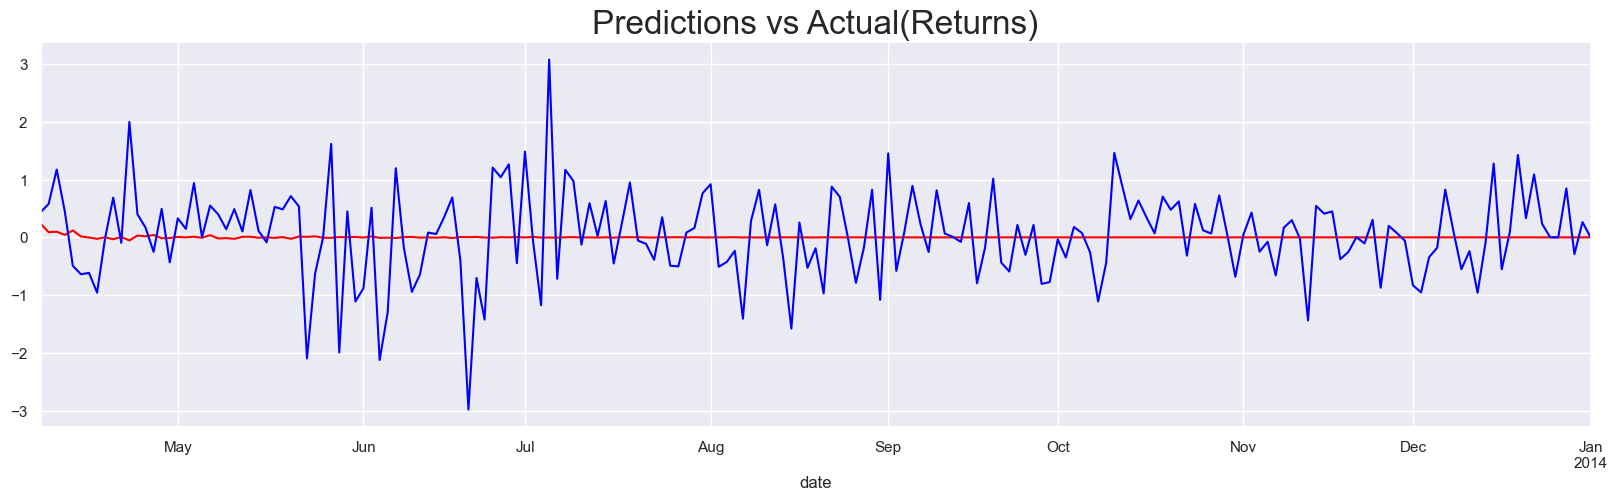

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_ret_sarma = SARIMAX(df.ret_ftse[1:], order=(3, 0, 4), seasonal_order=(3,0,2,5))  # ARMA(1,0) is equivalent to ARIMA(1,0,0)
results_ret_sarma = model_ret_sarma.fit()

df_ret_pred_sarma=results_ret_sarma.predict(start=start_date,end=end_date)

df_ret_pred_sarma[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual(Returns)",size=24)
plt.show()

## SARIMAX

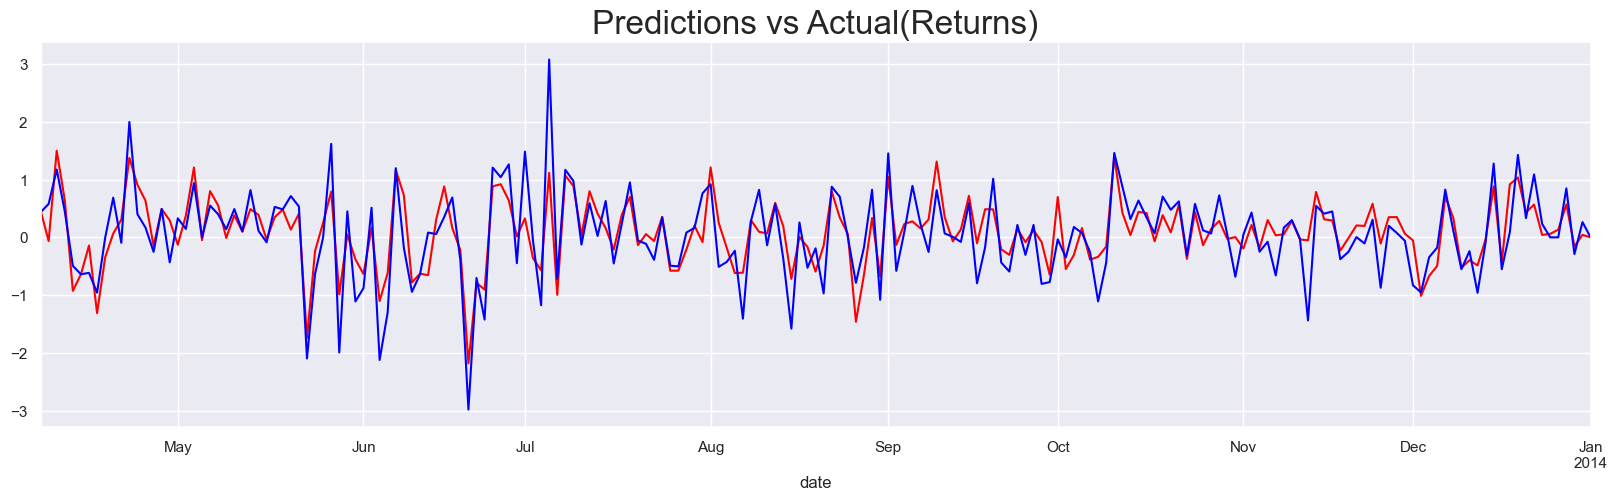

In [69]:
model_ret_sarimax=SARIMAX(df.ret_ftse[1:],exog= df[['ret_spx','ret_dax','ret_nikkei']][1:], order=(3, 0, 4), seasonal_order=(3,0,2,5))
results_ret_sarimax=model_ret_sarimax.fit()
#results_ret_armax.summary()

df_ret_pred_sarimax=results_ret_sarimax.predict(start=start_date,end=end_date,
                                           exog= df_test[['ret_spx','ret_dax','ret_nikkei']][start_date:end_date])
df_ret_pred_sarimax[start_date:end_date].plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual(Returns)",size=24)
plt.show()

## Auto ARIMA

In [86]:
from pmdarima.arima import auto_arima

In [90]:
model_auto = auto_arima(df.ret_ftse[1:])

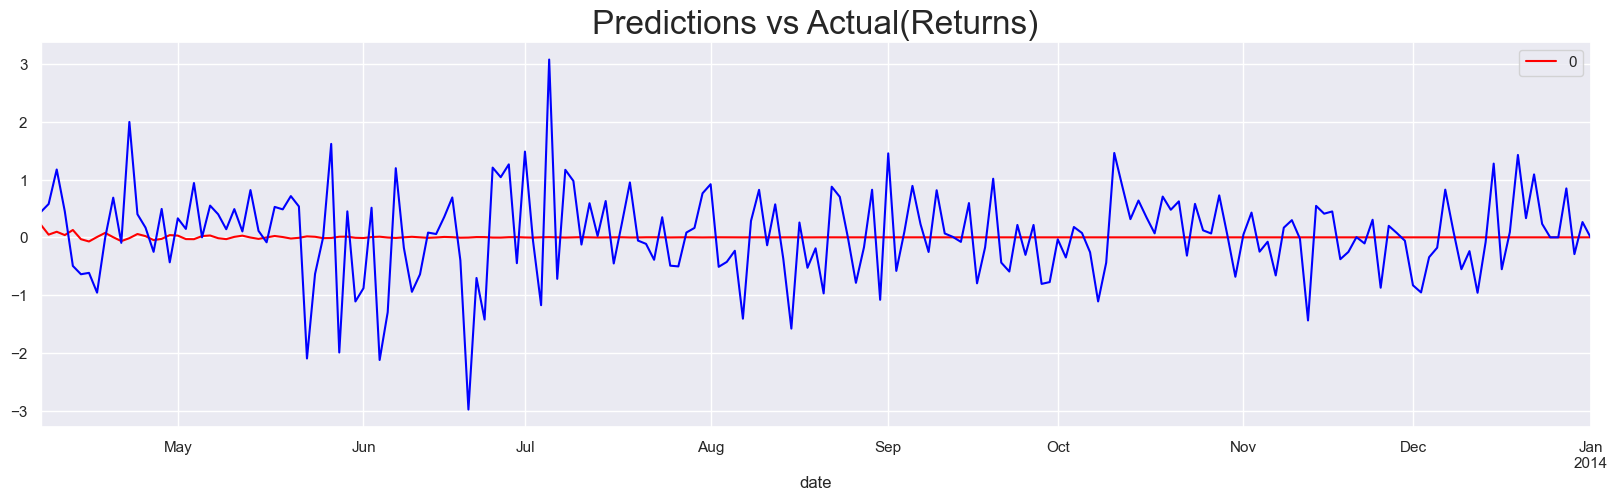

In [92]:
df_auto_pred=pd.DataFrame(model_auto.predict(n_periods=len(df_test[start_date:end_date])),
                          index=df_test[start_date:end_date].index)

df_auto_pred.plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual(Returns)",size=24)
plt.show()

In [107]:
model_auto = auto_arima(df.ret_ftse[1:], exogenous= df[['ret_spx','ret_dax','ret_nikkei']][1:], 
                       m=5,max_p=5,max_q=5,max_P=5,max_Q=5)

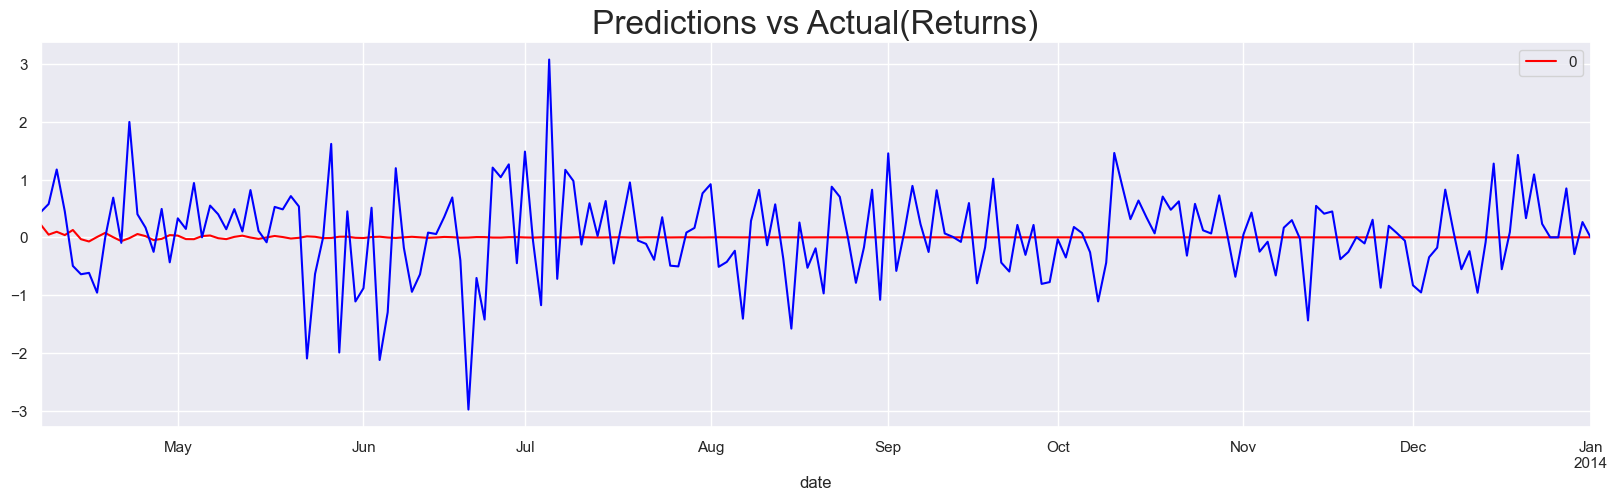

In [105]:
df_auto_pred=pd.DataFrame(model_auto.predict(n_periods=len(df_test[start_date:end_date]),
                                               exogenous= df_test[['ret_spx','ret_dax','ret_nikkei']][start_date:end_date]),
                                               index=df_test[start_date:end_date].index)

df_auto_pred.plot(figsize=(20,5),color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual(Returns)",size=24)
plt.show()

### Comparing all models

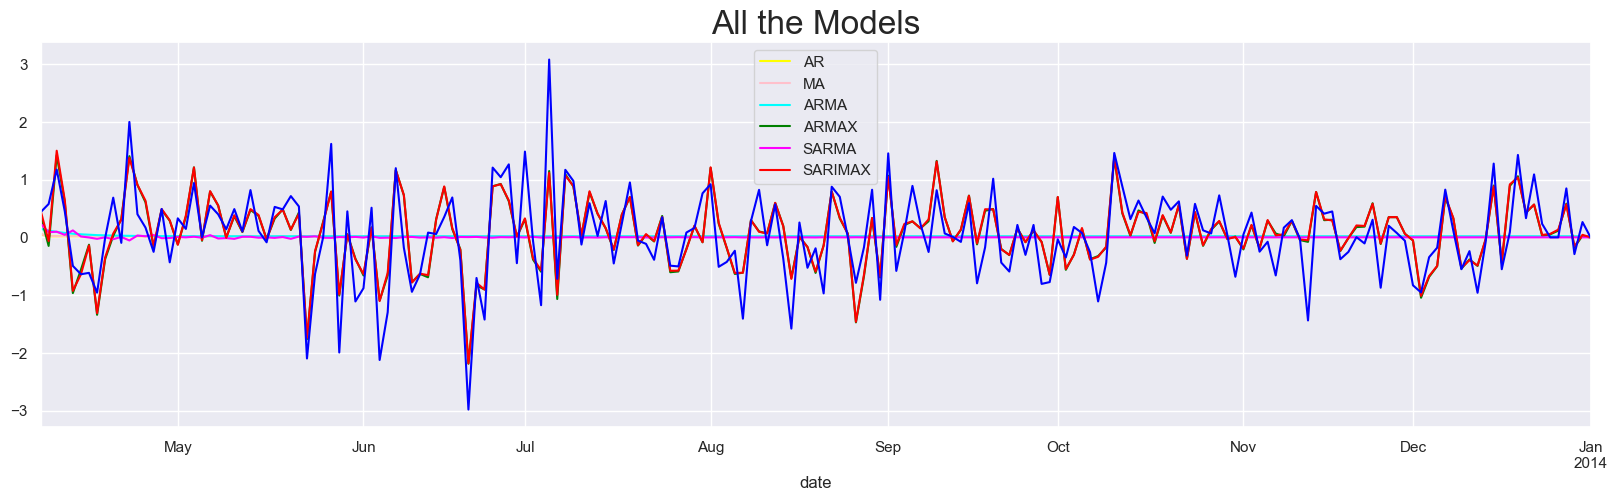

In [101]:
df_ret_pred[start_date:end_date].plot(figsize=(20,5),color="yellow")
df_ret_pred_ma[start_date:end_date].plot(color="pink")
df_ret_pred_arma11[start_date:end_date].plot(color="cyan")
df_ret_pred_armax[start_date:end_date].plot(color="green")
df_ret_pred_sarma[start_date:end_date].plot(color="magenta")
df_ret_pred_sarimax[start_date:end_date].plot(color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.legend(['AR','MA','ARMA','ARMAX','SARMA','SARIMAX'])
plt.title("All the Models",size=24)
plt.show()

## Forcasting Volatility

In [112]:
model_garch=arch_model(df_comp.ret_ftse[1:],mean='constant',vol='GARCH',p=1,q=1,dist='Normal')
results_garch=model_garch.fit(last_obs=start_date,update_freq=10)

Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478416067
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366189876
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


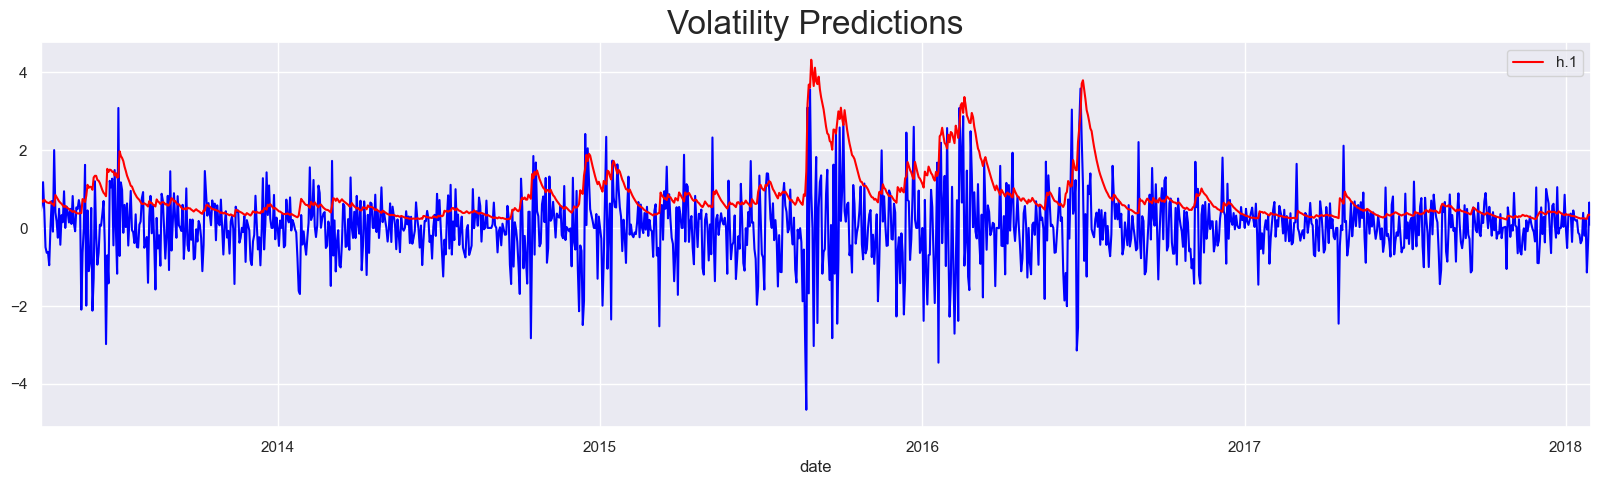

In [122]:
pred_garch=results_garch.forecast(horizon=1, align='target')

pred_garch.residual_variance[start_date:].plot(figsize=(20,5),color="red",zorder=2)
df_test.ret_ftse.plot(color="blue",zorder=1)
plt.title("Volatility Predictions",size=24)
plt.show()